In [5]:
import matplotlib.pyplot as plt
import json

In [2]:
%matplotlib inline

In [35]:
def json_plot(json_path):
    with open(json_path) as f:
        dat = json.load(f)
    train_loss = dat['train']
    dev_loss = dat['dev']
    x_lim = len(train_loss)
    y_lim_lb = 0.02
    y_lim_ub = 0.05
    fig = plt.figure()
    plt.plot(range(1,x_lim+1),train_loss,label='train')
    x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]
    plt.plot(x_per5,dev_loss,label='dev')
    plt.xlim(0,x_lim)
    plt.ylim(y_lim_lb,y_lim_ub)
    plt.title(json_path)
    fig.patch.set_alpha(1)
    plt.show()

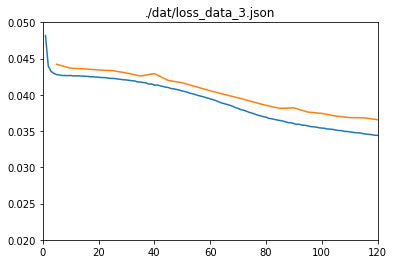

In [36]:
json_plot('./dat/loss_data_3.json')

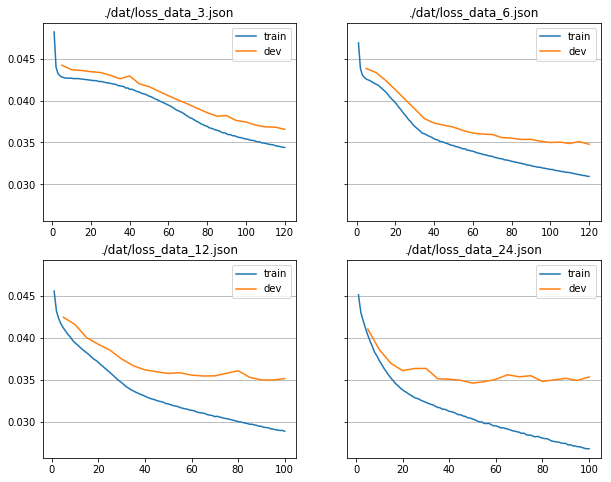

In [55]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(10,8))
fig.patch.set_alpha(1)

sample = [3,6,12,24]

for j in range(2):
    for i in range(2):
        json_path = "./dat/loss_data_{0}.json".format(sample[2*j+i])
        with open(json_path) as f:
            dat = json.load(f)
        train_loss = dat['train']
        dev_loss = dat['dev']
        
        x_lim = len(train_loss)
        x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]

        ax = axes[j, i]
        ax.plot(range(1,x_lim+1),train_loss)
        ax.plot(x_per5,dev_loss)
        ax.legend(['train','dev'])
        ax.set_title(json_path)
        ax.grid(True,axis='y')

fig.savefig('loss_graph.png')